#   Homework - 01 | Math 4260

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.stats import linregress

<b>Problem 1</b>: For showing the time complexities of the following functions, I will use 2 axis-sets:
- $T(n)$ vs $n$
- $log(T(n))$ vs $log(n)$

When we use a log-log plot to graph the relationship between the time complexity $t(n)$ of an algorithm and the size of the input $n$, we are effectively plotting $\log(t(n))$ against $\log(n)$. The slope $\frac{dy}{dx}$ in this case is the derivative of $\log(t(e^x))$ with respect to $x$, where $x = \log(n)$ and $y = \log(t(n))$. The derivative can be expressed as $\frac{1}{t(n)} \cdot t'(n) \cdot n$, which follows from the chain rule.

This slope $\frac{dy}{dx}$ on a log-log plot is particularly useful because it can give us the exponent $q$ in the complexity function $t(n) = n^q$, where $t(n)$ is the time taken by the algorithm. If the complexity is polynomial, say $t(n) = cn^q$, then the slope of the log-log plot will be $q$ because $\frac{dy}{dx}=\frac{1}{t(n)} \cdot t'(n) \cdot n=q$.

In [5]:
# some helper functions

def generate_matrix(n, diag=False):
    """
    Generate an n x n square matrix.

    Parameters:
    n (int): Size of the matrix.
    diag (bool): If True, generates a diagonal matrix. Otherwise, generates a full matrix.

    Returns:
    np.array: An n x n numpy array.
    """
    if diag:
        # Generate a diagonal matrix with random values on the diagonal
        matrix = np.zeros((n, n))
        np.fill_diagonal(matrix, np.random.rand(n))
    else:
        # Generate a full n x n matrix with random values
        matrix = np.random.rand(n, n)
    return matrix

def generate_vector(n):
    """
    Generate an n x 1 vector with random values.

    Parameters:
    n (int): Size of the vector.

    Returns:
    np.array: An n x 1 numpy array.
    """
    # Generate an n x 1 vector with random values
    vector = np.random.rand(n, 1)
    return vector

def generate_inputs(n, input_types):
    """
    Generate inputs for the compute function based on specified types.

    Parameters:
    n (int): The size of the inputs.
    input_types (dict): A dictionary specifying the types of inputs needed.

    Returns:
    dict: A dictionary of generated inputs.
    """
    inputs = {}
    if 'A' in input_types:
        inputs['A'] = generate_matrix(n)
    if 'B' in input_types:
        inputs['B'] = generate_matrix(n)
    if 'D' in input_types:
        inputs['D'] = generate_matrix(n, diag=True)
    if 'u' in input_types:
        inputs['u'] = generate_vector(n).flatten()
    if 'v' in input_types:
        inputs['v'] = generate_vector(n).flatten()
    return inputs

def plot_compute_function_performance(compute_func, input_types, only_log=False):
    """
    Plot the performance of a compute function.

    Parameters:
    compute_func (function): The compute function to test.
    input_types (dict): Specifies the types of inputs needed by compute_func.
    """
    ns = range(100, 1000, 100)
    times = []

    for n in ns:
        inputs = generate_inputs(n, input_types)
        start_time = time.time_ns()
        compute_func(**inputs)  # Pass the generated inputs as arguments
        end_time = time.time_ns()
        diff = end_time - start_time
        times.append(diff)
    
    slope, intercept, r_value, p_value, std_err = linregress(ns, times)
    log_ns = np.log(ns)
    log_times = np.log(times)
    log_slope, log_intercept, log_r_value, log_p_value, log_std_err = linregress(log_ns, log_times)

    # Plot Time vs. n
    if not only_log:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(ns, times, marker='o')
        plt.xlabel('Matrix/Vector Size (n)')
        plt.ylabel('Execution Time (seconds)')
        plt.title('Execution Time vs. Matrix/Vector Size')
        plt.grid(True)

        plt.tight_layout()
        plt.figtext(0.5, 0.01, f'Slope of plot: {slope:.2f}', ha='center')
        plt.show()

    # Plot log(T(n)) vs. log(n)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    plt.plot(log_ns, log_times, marker='o', label=f'Slope = {slope:.2f}')
    plt.xlabel('log(n)')
    plt.ylabel('log(Execution Time)')
    plt.title('Log-Log Plot of Execution Time vs. Matrix/Vector Size')
    plt.grid(True)
    
    plt.tight_layout()
    plt.figtext(0.5, 0.01, f'Slope of log-log plot: {log_slope:.2f}', ha='center')
    plt.show()

<b>Part A</b>: Computing $Tr(D+u\cdot v^T)$

Strategy: Instead of performing all the matrix and vector multiplications, we can simplify the problem as follows:<br>
- Let $D+u\cdot v^T=C$. After numeric math, we can see that $C_{ij}=u_{i}\cdot v_{j} + (i=j)\cdot D_{ij}$
- Hence, for diagonal entries of $C$, we have $C_{ii}=u_{i}\cdot v_{i}+D_{ii}$

We know that for the trace, we only need the diagonal value. Hence, we only have to compute $u_{i}\cdot v_{i}+D_{ii}$ $\forall i$ in $[1, 2, 3\dots n]$ and sum them up. This can be done in $O(n)$.

In [3]:
def compute_trace(D, u, v):
    """
    Compute the trace of D + uv^T.

    Parameters:
    D (list of list or np.array): Diagonal matrix D of size n*n.
    u (list or np.array): Vector u of size n*1.
    v (list or np.array): Vector v of size n*1.

    Returns:
    float: The trace of the matrix sum D + uv^T.
    """
    trace = 0
    for i in range(len(u)):
        trace += D[i][i] + u[i] * v[i]  # D[i][i] is the ith diagonal element of D
    return trace

We can now run this function on different values of n and plot the time taken for each on a graph.

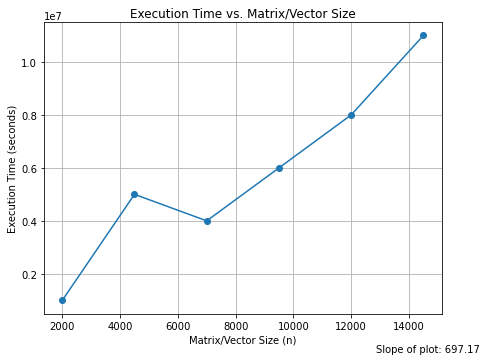

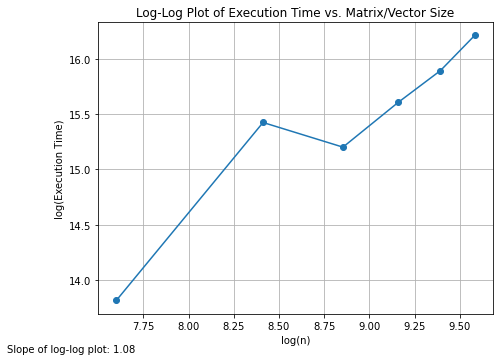

In [4]:
plot_compute_function_performance(compute_trace, {'D': True, 'u': True, 'v': True})

<b>Part B</b>: Computing $uv^TA=C$

Strategy: Instead of computing the full matrix multiplication, we optimize by recognizing that the computation of each element of the resulting matrix $C$ only requires the sum of element-wise products of corresponding elements of $u$, $v$, and the transpose of $A$. This way each element in $C$ will have $n$ products that will be common which we can compute earlier and store them, so we won't have to do the heavy $O(n^2)$ computation for every element.

The element $C_{ij}$ of matrix $C$ is given by:
$$
C_{ij} = u_i \cdot \sum_{k=1}^{n} v_k \cdot A_{kj}
$$

In [5]:
def compute_uvT_A(u, v, A):
    """
    Compute the matrix product uv^T A.

    Parameters:
    u (list): Vector u of size n*1.
    v (list): Vector v of size n*1.
    A (list of list): Matrix A of size n*n.

    Returns:
    list of list: The resulting matrix C.
    """
    n = len(u)
    C = [[0 for _ in range(n)] for _ in range(n)]
    sum_v_A = [sum(v[k] * A[k][j] for k in range(n)) for j in range(n)]

    # Compute each entry of the matrix C.
    for i in range(n):
        for j in range(n):
            C[i][j] = u[i] * sum_v_A[j]
            
    return C

u = [1, 2, 3]  # Replace with actual vector u
v = [4, 5, 6]  # Replace with actual vector v
A = [[7, 8, 9], [10, 11, 12], [13, 14, 15]]  # Replace with actual matrix A

C = compute_uvT_A(u, v, A)
for row in C:
    print(row)

uvT = np.multiply(np.array(u), np.matrix(v).T)

# Compute uv^T * A
result = np.matmul(uvT.T, A)

print("Resulting matrix:\n", result)


[156, 171, 186]
[312, 342, 372]
[468, 513, 558]
Resulting matrix:
 [[156 171 186]
 [312 342 372]
 [468 513 558]]


We can now run this function on different values of n and plot the time taken for each on a graph.

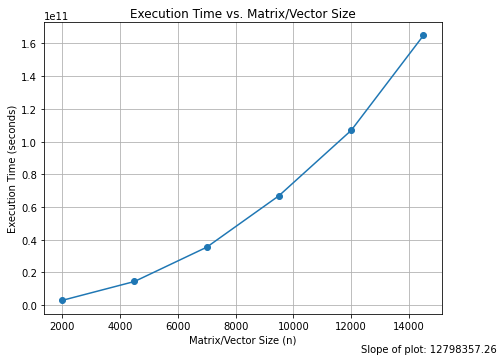

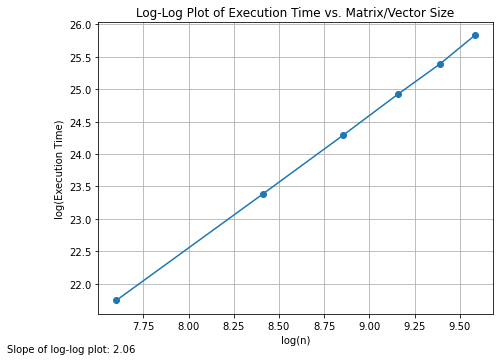

In [6]:
plot_compute_function_performance(compute_uvT_A, {'u': True, 'v': True, 'A': True})

<b>Part C</b>: Computing $(I + uu^T)v=C$

Strategy: We note that the matrix $I + uu^T$ is symmetric and its multiplication by vector $v$ can be optimized. Each entry $C_i$ in the resulting vector $C$ can be computed as follows:

$$
C_i = (u_i^2 + 1)v_i + u_i \sum_{j \neq i} u_j v_j
$$

To compute this efficiently, we observe that the term $\sum_{j \neq i} u_j v_j$ can be computed once and updated incrementally for each $i$. This reduces the complexity of computing the non-diagonal part from $O(n^2)$ to $O(n)$.

The diagonal part $(u_i^2 + 1)v_i$ is simply the diagonal of $uu^T$ times $v$, plus the contribution of the identity matrix, which is straightforward to compute for each $i$ with complexity $O(1)$.

Thus, the entire computation for each $C_i$ is $O(n)$, and the overall complexity for computing the vector $C$ is $O(n)$.

In [7]:
def compute_I_plus_uuT_times_v(u, v):
    """
    Compute the product (I + uu^T)v.

    Parameters:
    u (list): Vector u of size n*1.
    v (list): Vector v of size n*1.

    Returns:
    list: The resulting vector C.
    """
    n = len(u)
    C = [0 for _ in range(n)]
    sum_uv = sum(u[j] * v[j] for j in range(n))

    # Compute each entry of the vector C.
    for i in range(n):
        C[i] = (u[i] ** 2 + 1) * v[i] + u[i] * (sum_uv - u[i] * v[i])
        
    return C

# Example usage:
u = [1, 2, 3]  # Replace with actual vector u
v = [4, 5, 6]  # Replace with actual vector v

C = compute_I_plus_uuT_times_v(u, v)
u=np.array(u)
v=np.array(v)
print(np.matmul(np.add(np.identity(3), u@u.T),v))
print(C)

[214. 215. 216.]
[36, 69, 102]


We can now run this function on different values of n and plot the time taken for each on a graph.

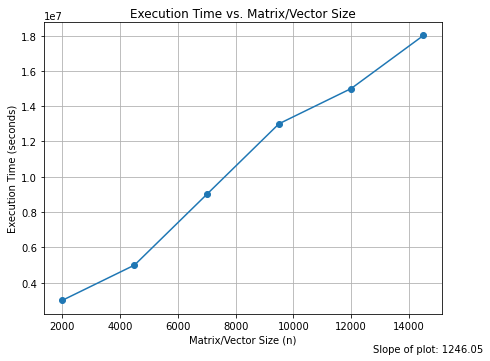

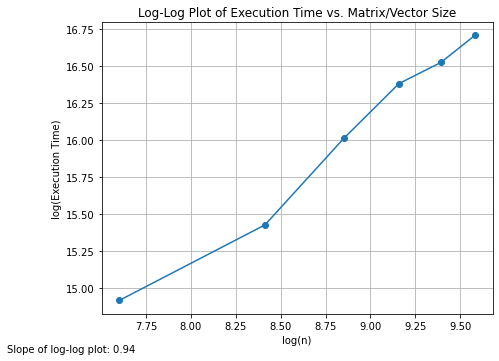

In [8]:
plot_compute_function_performance(compute_I_plus_uuT_times_v, {'u': True, 'v': True})

<b>Part D</b>: Computing $v^T A B u=C$

Strategy: The computation of $v^T A B u$ can be decomposed into two parts for efficiency. We first compute the intermediate row vector $D = v^T A$, where each element $D_i$ is computed as $D_i = \sum_{j=1}^{n} v_j a_{ji}$. Then, we compute the intermediate column vector $E = B u$, with each element $E_i$ given by $E_i = \sum_{j=1}^{n} b_{ij} u_j$. The final scalar result $C$ is then the dot product of $D$ and $E$: $C = \sum_{i=1}^{n} D_i E_i$. This approach efficiently utilizes two matrix-vector multiplications followed by a vector-vector multiplication, maintaining an overall complexity of $O(n^2)$.

We can decompose the problem into 2 parts because of the associative property of matrix multiplication.

Each step is carefully chosen to ensure that we are only performing necessary computations and taking advantage of the associative property of matrix multiplication to minimize the computational cost.

In [9]:
def compute_vTABu(v, A, B, u):
    """
    Compute the scalar product v^T A B u using NumPy, with an intermediate step.

    Parameters:
    v (np.array): Row vector v of size n.
    A (np.array): Matrix A of size n*n.
    B (np.array): Matrix B of size n*n.
    u (np.array): Column vector u of size n.

    Returns:
    float: The resulting scalar after computing v^T A B u.
    """
    n = len(u)
    D = [sum(v[j] * A[j][i] for j in range(n)) for i in range(n)]
    E = [sum(B[i][j] * u[j] for j in range(n)) for i in range(n)]

    # Compute the final result C = D dot E
    C = sum(D[i] * E[i] for i in range(n))
    
    return C

# Example usage:
v = np.array([1, 2, 3])  # Replace with actual row vector v
A = np.array([[4, 5, 6], [7, 8, 9], [10, 11, 12]])  # Replace with actual matrix A
B = np.array([[13, 14, 15], [16, 17, 18], [19, 20, 21]])  # Replace with actual matrix B
u = np.array([22, 23, 24])  # Replace with actual column vector u

scalar_result = compute_vTABu(v, A, B, u)
print(scalar_result)

192834


We can now run this function on different values of n and plot the time taken for each on a graph.

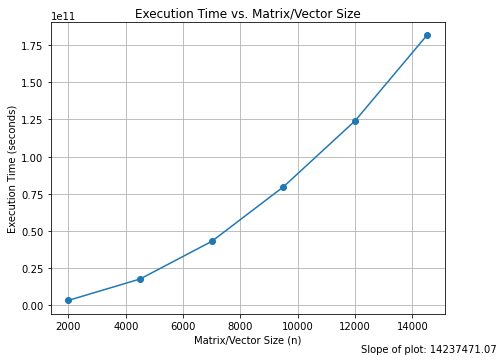

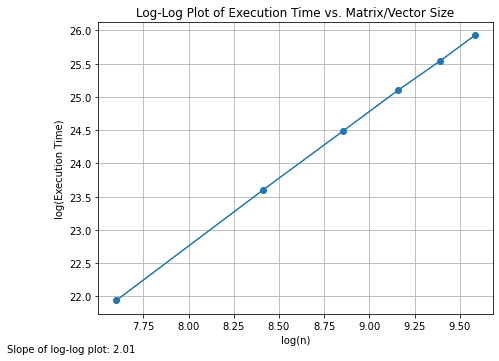

In [10]:
plot_compute_function_performance(compute_vTABu, {'v': True, 'A': True, 'B': True, 'u': True})

<b>Part E</b>: Matrix Product

$C(i,j) = \sum_k A(i,k)B(k,j)$: It requires us to perform $n*n*n$ operations. Therefore, the complexity is $O(n^3)$.


In [3]:
def matrix_product(A, B):
    """
    Compute the product of two matrices A and B.
    
    Parameters:
    A (np.array): The first matrix of size n*n.
    B (np.array): The second matrix of size n*n.

    Returns:
    np.array: The resulting matrix C.
    """
    C = [[0 for _ in range(len(A))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A)):
            for k in range(len(A)):
                C[i][j] += A[i][k] * B[k][j]
    return C

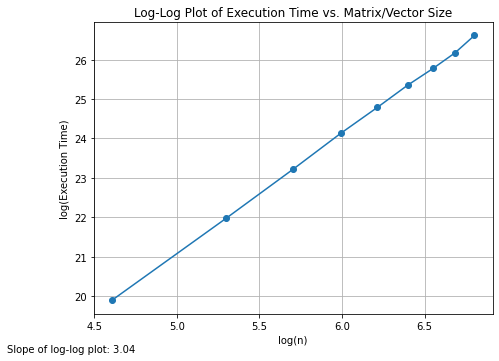

In [6]:
plot_compute_function_performance(matrix_product, {"A":True, "B": True}, True)

**Part F**: Matrix Product with Vector Multiplication

$C(:,i) = A(B(:,i))$

This will require us to perform matrix-vector ($n^2$ operations) $n$ times. Therefore, the complexity would be $O(n*n^2)=O(n^3)$.

In [ ]:
def matrix_product_vector(A, B):
    """
    Compute the product of two matrices A and B using NumPy.

    Parameters:
    A (np.array): The first matrix of size n*n.
    B (np.array): The second matrix of size n*n.

    Returns:
    np.array: The resulting matrix C.
    """
    n = A.shape[0]
    C = np.zeros((n,n))
    for i in range(len(A)):
        C[:, i] = np.dot(A, B[:, i])
    return C

In [4]:
A = generate_matrix(3)
B = generate_matrix(3)

print(np.dot(A, B))
print(matrix_product_vector(A, B))

[[1.22776913 1.65878742 0.8902774 ]
 [0.98380803 1.23028949 0.91184175]
 [1.25927997 1.54190902 0.63711092]]
[[1.22776913 1.65878742 0.8902774 ]
 [0.98380803 1.23028949 0.91184175]
 [1.25927997 1.54190902 0.63711092]]


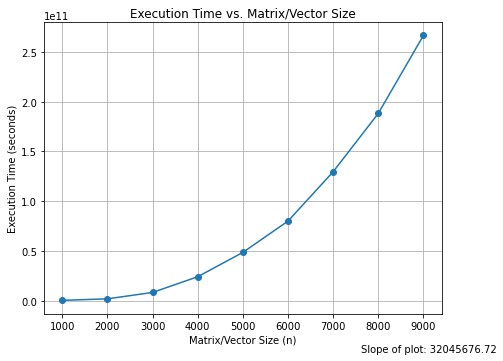

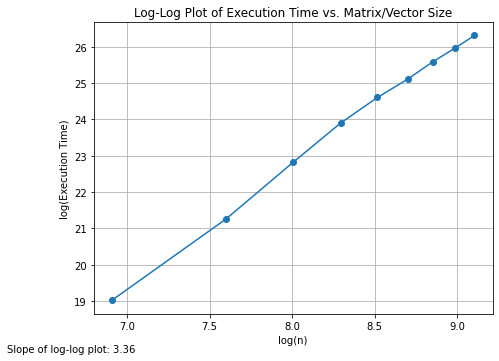

In [5]:
plot_compute_function_performance(matrix_product_vector, {"A":True, "B": True})

**Part G**: Matrix Product

Numpy has an approximate time-complexity of $O(n^3)$ for matrix-matrix multiplication of sizes $n*n$. Therefore, the complexity here is also $O(n^3)$. However, optimizations done by numpy could affect the slope of the graph.

In [6]:
def matrix_mult(A, B):
    """
    Compute the product of two matrices A and B using NumPy.

    Parameters:
    A (np.array): The first matrix of size n*n.
    B (np.array): The second matrix of size n*n.

    Returns:
    np.array: The resulting matrix C.
    """
    C = np.dot(A, B)
    return C

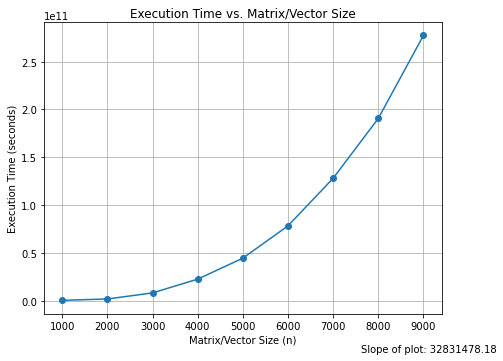

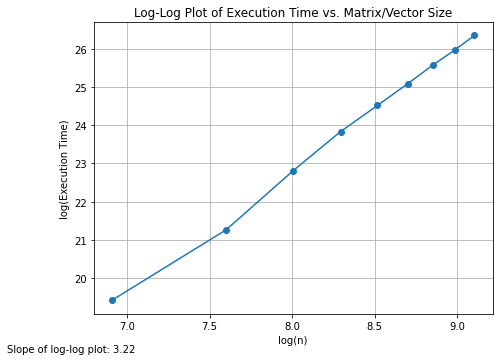

In [7]:
plot_compute_function_performance(matrix_product_vector, {"A":True, "B": True})